## Steps
 ### 1. Import important libraries and modules -
 **EDA**
 - Basic EDA
 - Missing Data
 - Duplicated Data
 - Data Visualization
 - Outliers and Anilomalies
 - Feature Encoding
 - Feature Selection


 ### 2. Model Building -
  - Separate your independent and dependent data
  - Split your data into Test and Train
  - Model Selection
  - Model Training
  - Model Prediction
  - Model Evaluation 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

print("Set up Complete")

Set up Complete


In [2]:
df = pd.read_csv("USA_Housing.csv")


In [3]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


### Basic EDA -

In [4]:
df.size

35000

In [5]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [6]:
df.shape

(5000, 7)

In [7]:
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [9]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [10]:
df.nunique()

Avg. Area Income                5000
Avg. Area House Age             5000
Avg. Area Number of Rooms       5000
Avg. Area Number of Bedrooms     255
Area Population                 5000
Price                           5000
Address                         5000
dtype: int64

In [11]:
df["Avg. Area Number of Bedrooms"].unique()

array([4.09, 3.09, 5.13, 3.26, 4.23, 4.04, 3.41, 2.42, 2.3 , 6.1 , 4.1 ,
       4.49, 3.1 , 2.27, 4.37, 4.01, 3.12, 4.3 , 5.12, 5.49, 4.07, 2.1 ,
       4.31, 6.34, 4.33, 2.03, 4.  , 3.04, 3.24, 4.42, 5.36, 6.29, 6.  ,
       2.07, 3.01, 2.39, 2.5 , 2.17, 6.3 , 4.43, 4.44, 6.32, 3.18, 6.35,
       3.22, 2.13, 4.02, 6.36, 3.32, 4.12, 6.41, 5.08, 3.06, 2.28, 4.2 ,
       4.32, 5.43, 3.13, 3.28, 3.27, 3.08, 3.17, 3.15, 6.25, 3.43, 4.38,
       6.16, 4.28, 4.11, 6.24, 3.35, 4.48, 3.2 , 3.07, 3.39, 3.38, 6.06,
       3.3 , 3.46, 3.33, 4.41, 2.38, 2.37, 3.45, 2.02, 2.14, 2.23, 2.44,
       2.29, 4.19, 6.04, 5.28, 5.1 , 5.45, 4.36, 2.05, 6.39, 4.45, 4.22,
       6.44, 4.35, 3.37, 6.2 , 6.19, 2.49, 2.04, 4.46, 5.15, 3.21, 6.45,
       3.44, 2.18, 3.49, 6.26, 4.14, 4.27, 5.04, 4.06, 6.4 , 3.25, 5.33,
       3.  , 2.47, 3.31, 3.14, 4.18, 5.07, 6.11, 2.  , 5.3 , 4.26, 2.31,
       3.48, 3.29, 3.11, 3.36, 2.15, 6.18, 5.25, 4.47, 5.21, 4.15, 6.37,
       6.49, 6.28, 2.09, 4.29, 6.21, 2.08, 4.24, 2.

In [12]:
df["Number Of Bedrooms"] = df["Avg. Area Number of Bedrooms"].apply(lambda x:str(x).split(".")[0])

In [13]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address,Number Of Bedrooms
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701...",4
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA...",3
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482...",5
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820,3
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386,4


In [14]:
df.drop(columns=["Avg. Area Number of Bedrooms","Address"],axis = 1,inplace = True)

In [15]:
df.head(3)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,Price,Number Of Bedrooms
0,79545.458574,5.682861,7.009188,23086.800503,1.059034e+06,4
1,79248.642455,6.002900,6.730821,40173.072174,1.505891e+06,3
2,61287.067179,5.865890,8.512727,36882.159400,1.058988e+06,5


#### Missing Data -

In [16]:
df.isnull().sum()

Avg. Area Income             0
Avg. Area House Age          0
Avg. Area Number of Rooms    0
Area Population              0
Price                        0
Number Of Bedrooms           0
dtype: int64

In [17]:
df.isnull().any()

Avg. Area Income             False
Avg. Area House Age          False
Avg. Area Number of Rooms    False
Area Population              False
Price                        False
Number Of Bedrooms           False
dtype: bool

#### Duplicated Data -

In [18]:
df.duplicated().sum()

np.int64(0)

In [19]:
df[df.duplicated()]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,Price,Number Of Bedrooms


#### Outliers and Anlomalies -
 - Boxplot
 - IQR

In [20]:
df.dtypes

Avg. Area Income             float64
Avg. Area House Age          float64
Avg. Area Number of Rooms    float64
Area Population              float64
Price                        float64
Number Of Bedrooms            object
dtype: object

In [21]:
df["Number Of Bedrooms"] = df["Number Of Bedrooms"].astype(int)



In [22]:
df.dtypes

Avg. Area Income             float64
Avg. Area House Age          float64
Avg. Area Number of Rooms    float64
Area Population              float64
Price                        float64
Number Of Bedrooms             int64
dtype: object

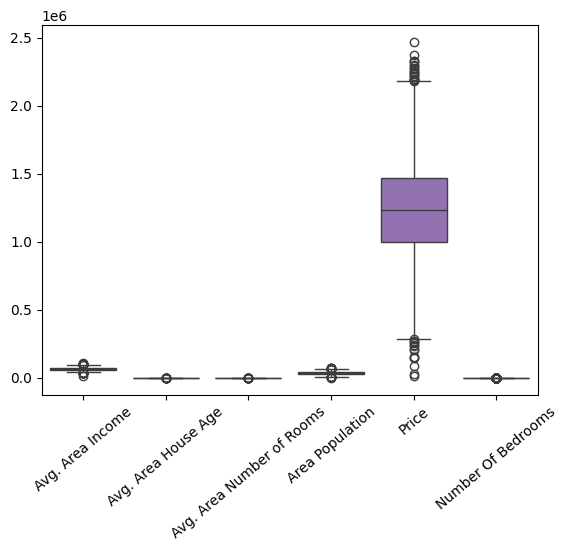

In [23]:
sns.boxplot(df)
plt.xticks(rotation = 40)
plt.show()

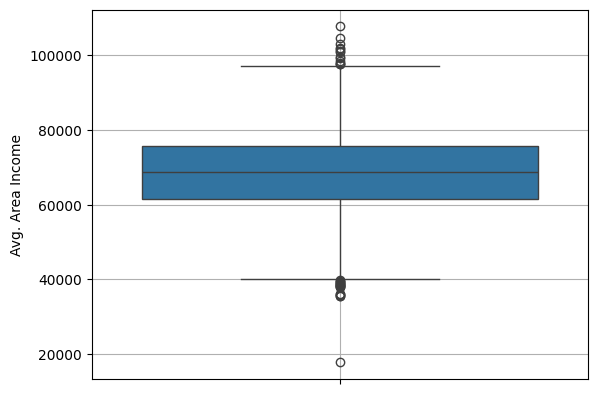

In [24]:
sns.boxplot(df["Avg. Area Income"])
plt.grid()
plt.show()

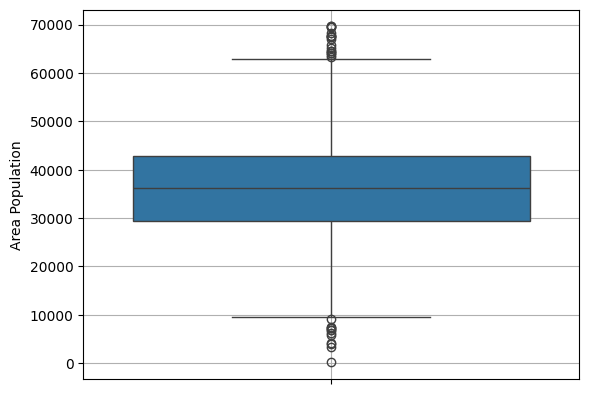

In [25]:
sns.boxplot(df["Area Population"])
plt.grid()
plt.show()

In [26]:
df["Area Population"].describe()

count     5000.000000
mean     36163.516039
std       9925.650114
min        172.610686
25%      29403.928702
50%      36199.406689
75%      42861.290769
max      69621.713378
Name: Area Population, dtype: float64

In [27]:
cols = df.select_dtypes(np.number).columns
cols

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Area Population', 'Price', 'Number Of Bedrooms'],
      dtype='object')

-------------------Avg. Area Income-------------


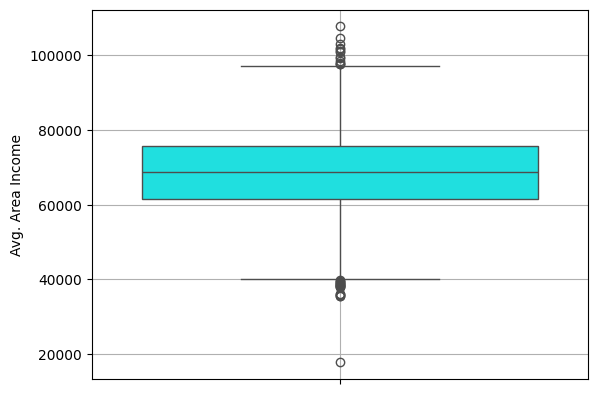

-------------------Avg. Area House Age-------------


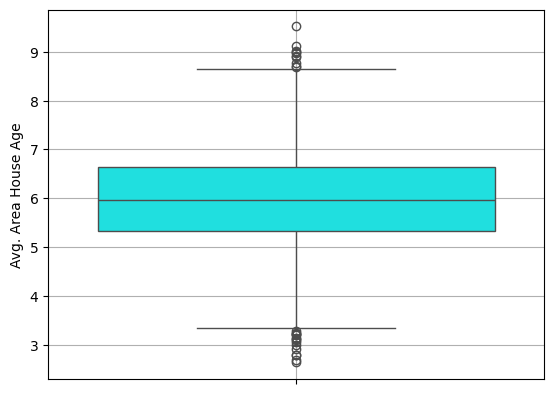

-------------------Avg. Area Number of Rooms-------------


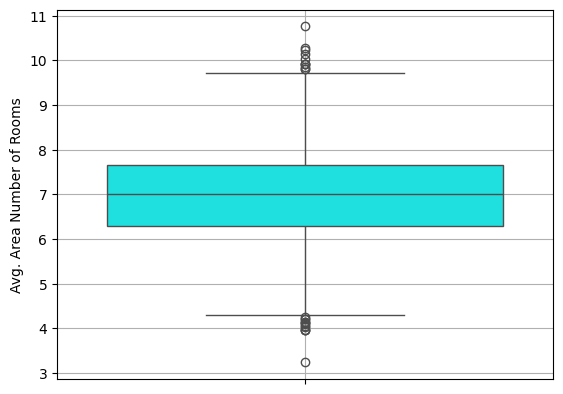

-------------------Area Population-------------


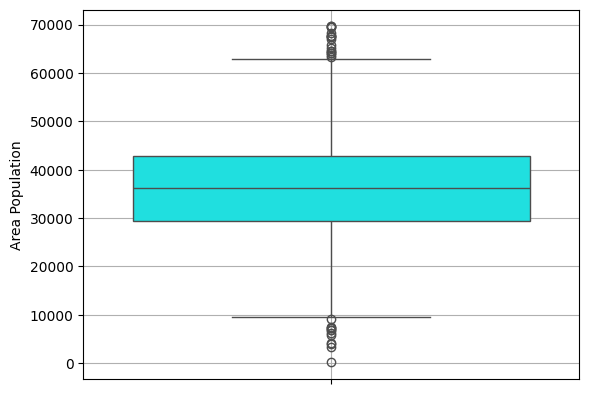

-------------------Number Of Bedrooms-------------


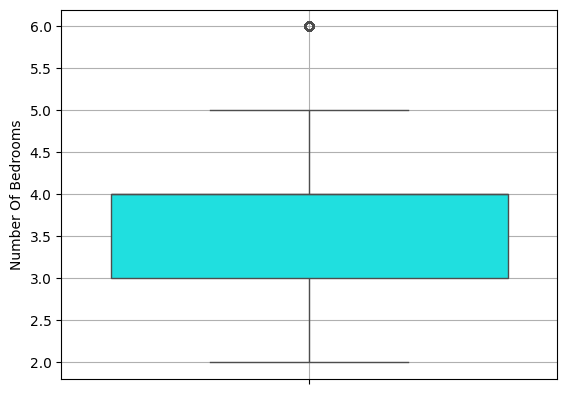

In [28]:
for i in cols:
    if i == "Price":
        pass
    else:
        print(f"-------------------{i}-------------")
        sns.boxplot(df[i],color = "aqua")
        plt.grid()
        plt.show()

#### Inter Quartile Range -

In [38]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

In [39]:
IQR = Q3-Q1

In [40]:
print(f"IQR : \n{IQR}")

IQR : 
Avg. Area Income              14302.776278
Avg. Area House Age               1.328525
Avg. Area Number of Rooms         1.366621
Area Population               13457.362067
Price                        473633.069163
Number Of Bedrooms                1.000000
dtype: float64


In [41]:
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

In [42]:
print(f"Lower bound for outliers : \n{lower_bound}\n\n")
print(f"Upper bound for outliers : \n{upper_bound}")

Lower bound for outliers : 
Avg. Area Income              40026.397972
Avg. Area House Age               3.329495
Avg. Area Number of Rooms         4.249318
Area Population                9217.885601
Price                        287127.531305
Number Of Bedrooms                1.500000
dtype: float64


Upper bound for outliers : 
Avg. Area Income             9.723750e+04
Avg. Area House Age          8.643597e+00
Avg. Area Number of Rooms    9.715803e+00
Area Population              6.304733e+04
Price                        2.181660e+06
Number Of Bedrooms           5.500000e+00
dtype: float64


In [43]:
df[~((df<lower_bound) | (df>upper_bound)).any(axis = 1)]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,Price,Number Of Bedrooms
0,79545.458574,5.682861,7.009188,23086.800503,1.059034e+06,4
1,79248.642455,6.002900,6.730821,40173.072174,1.505891e+06,3
2,61287.067179,5.865890,8.512727,36882.159400,1.058988e+06,5
3,63345.240046,7.188236,5.586729,34310.242831,1.260617e+06,3
4,59982.197226,5.040555,7.839388,26354.109472,6.309435e+05,4
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,22837.361035,1.060194e+06,3
4996,78491.275435,6.999135,6.576763,25616.115489,1.482618e+06,4
4997,63390.686886,7.250591,4.805081,33266.145490,1.030730e+06,2
4998,68001.331235,5.534388,7.130144,42625.620156,1.198657e+06,5


In [44]:
data = df[~((df<lower_bound) | (df>upper_bound)).any(axis = 1)]

In [45]:
data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,Price,Number Of Bedrooms
0,79545.458574,5.682861,7.009188,23086.800503,1.059034e+06,4
1,79248.642455,6.002900,6.730821,40173.072174,1.505891e+06,3
2,61287.067179,5.865890,8.512727,36882.159400,1.058988e+06,5
3,63345.240046,7.188236,5.586729,34310.242831,1.260617e+06,3
4,59982.197226,5.040555,7.839388,26354.109472,6.309435e+05,4
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,22837.361035,1.060194e+06,3
4996,78491.275435,6.999135,6.576763,25616.115489,1.482618e+06,4
4997,63390.686886,7.250591,4.805081,33266.145490,1.030730e+06,2
4998,68001.331235,5.534388,7.130144,42625.620156,1.198657e+06,5


----------Avg. Area Income--------


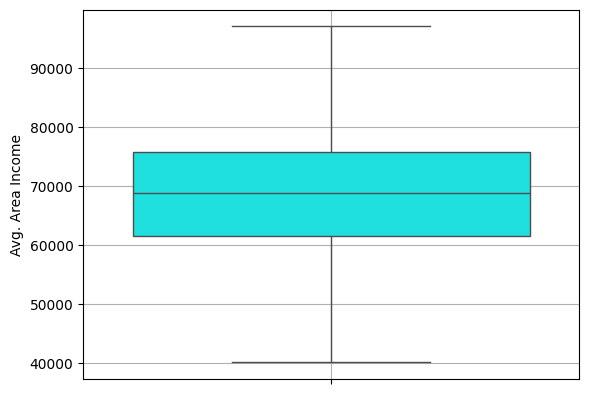

----------Avg. Area House Age--------


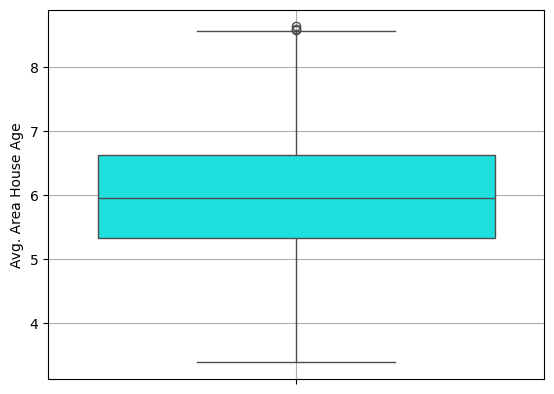

----------Avg. Area Number of Rooms--------


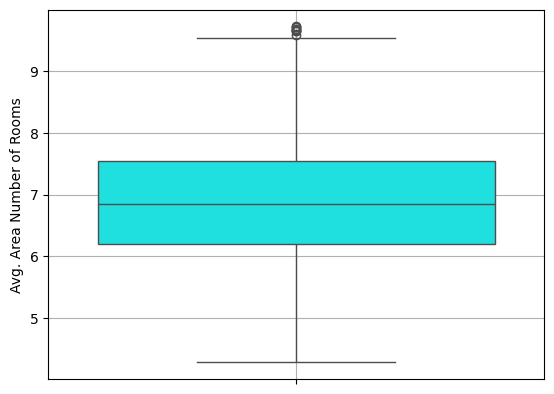

----------Area Population--------


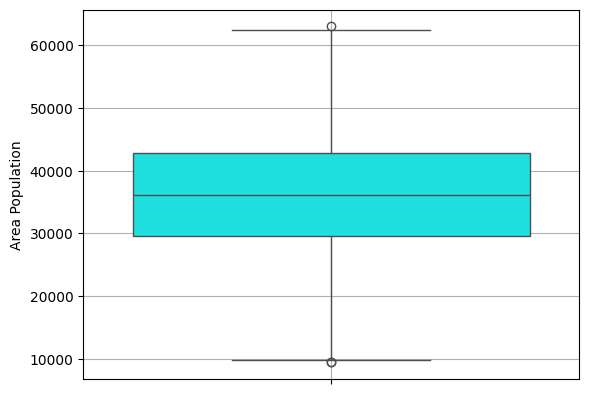

----------Number Of Bedrooms--------


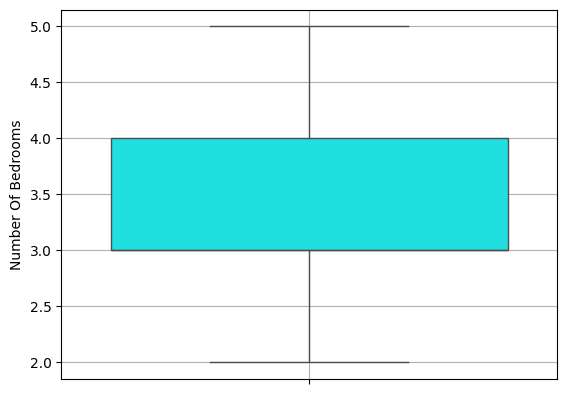

In [47]:
for i in cols:
    if i == "Price":
        pass
    else:
        print(f"----------{i}--------")
        sns.boxplot(data[i],color = "aqua")
        plt.grid()
        plt.show()

#### Feature Selection -

In [48]:
data.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,Price,Number Of Bedrooms
Avg. Area Income,1.000000,-0.013087,-0.025357,-0.010650,0.634662,0.004843
Avg. Area House Age,-0.013087,1.000000,-0.017788,-0.024623,0.445816,-0.008336
Avg. Area Number of Rooms,-0.025357,-0.017788,1.000000,0.004670,0.325262,0.397246
Area Population,-0.010650,-0.024623,0.004670,1.000000,0.408388,-0.009578
Price,0.634662,0.445816,0.325262,0.408388,1.000000,0.142003
Number Of Bedrooms,0.004843,-0.008336,0.397246,-0.009578,0.142003,1.000000


In [50]:
data.corr()["Price"]

Avg. Area Income             0.634662
Avg. Area House Age          0.445816
Avg. Area Number of Rooms    0.325262
Area Population              0.408388
Price                        1.000000
Number Of Bedrooms           0.142003
Name: Price, dtype: float64

#### Model Building -

In [51]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,Price,Number Of Bedrooms
0,79545.458574,5.682861,7.009188,23086.800503,1.059034e+06,4
1,79248.642455,6.002900,6.730821,40173.072174,1.505891e+06,3
2,61287.067179,5.865890,8.512727,36882.159400,1.058988e+06,5
3,63345.240046,7.188236,5.586729,34310.242831,1.260617e+06,3
4,59982.197226,5.040555,7.839388,26354.109472,6.309435e+05,4


#### Separating Independent and Dependent Data -

In [52]:
X = data.drop(columns = ["Price"],axis = 1)
y = data["Price"]

In [53]:
X

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,Number Of Bedrooms
0,79545.458574,5.682861,7.009188,23086.800503,4
1,79248.642455,6.002900,6.730821,40173.072174,3
2,61287.067179,5.865890,8.512727,36882.159400,5
3,63345.240046,7.188236,5.586729,34310.242831,3
4,59982.197226,5.040555,7.839388,26354.109472,4
...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,22837.361035,3
4996,78491.275435,6.999135,6.576763,25616.115489,4
4997,63390.686886,7.250591,4.805081,33266.145490,2
4998,68001.331235,5.534388,7.130144,42625.620156,5


In [54]:
y

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 4267, dtype: float64

#### Spliting data into train and test data -

In [55]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [56]:
X_train

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,Number Of Bedrooms
1964,63272.130672,7.534723,7.301821,46311.956302,3
1363,62639.159808,5.550184,5.457061,27812.685914,2
226,44731.109800,4.188658,8.942797,39633.473041,5
1064,63787.536354,4.643254,6.007780,22449.534005,3
659,86640.801599,6.047922,5.652141,22432.139832,3
...,...,...,...,...,...
4034,50016.428818,5.584993,5.662718,29559.226067,3
541,71222.597831,5.217987,7.758415,54677.972817,3
3630,49927.721118,6.791302,7.840698,56983.076896,5
4416,71717.869352,7.101054,7.620691,27524.955933,3


In [57]:
X_test

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,Number Of Bedrooms
2003,56868.107679,6.474246,6.589028,31060.204727,3
1372,72683.529875,6.033751,6.753219,18539.100698,3
362,73423.902954,5.975373,5.810943,34711.782422,3
1548,74102.490860,6.206707,6.682488,43971.514135,4
4543,84556.636265,5.092459,6.723412,31797.317444,2
...,...,...,...,...,...
1066,64461.392146,7.949614,6.675121,34210.936079,2
517,87119.121466,6.831473,6.654885,34671.598412,4
1739,43496.725665,6.076353,6.743362,35726.605630,2
773,62755.452766,6.109441,6.796277,41525.377695,3


In [58]:
y_train

1964    1.438291e+06
1363    4.769715e+05
226     6.019730e+05
1064    4.332472e+05
659     1.306207e+06
            ...     
4034    4.973680e+05
541     1.350459e+06
3630    1.352096e+06
4416    1.390991e+06
1004    1.532846e+06
Name: Price, Length: 3413, dtype: float64

In [59]:
y_test

2003    7.759577e+05
1372    9.425090e+05
362     1.153470e+06
1548    1.394424e+06
4543    1.326847e+06
            ...     
1066    1.236875e+06
517     1.601904e+06
1739    7.186506e+05
773     1.025705e+06
1306    1.095879e+06
Name: Price, Length: 854, dtype: float64

### Model Selection 

#### Linear Regression -

In [60]:
lr = LinearRegression()

In [61]:
lr.fit(X_train,y_train)

LinearRegression()

In [62]:
print(f"training accuracy : {round(lr.score(X_train,y_train),2)*100}%")
print(f"testing accuracy : {round(lr.score(X_test,y_test),2)*100}%")

training accuracy : 91.0%
testing accuracy : 91.0%


#### Dicision Tree -

In [70]:
dt = DecisionTreeRegressor(max_depth = 9)

In [71]:
dt.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=9)

In [72]:
print(f"training accuracy : {round(dt.score(X_train,y_train),2)*100}%")
print(f"testing accuracy : {round(dt.score(X_test,y_test),2)*100}%")

training accuracy : 93.0%
testing accuracy : 77.0%


#### Random Forest -

In [79]:
rf = RandomForestRegressor(max_depth = 8)

In [80]:
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=8)

In [81]:
print(f"training accuracy : {round(rf.score(X_train,y_train),2)*100}%")
print(f"testing accuracy : {round(rf.score(X_test,y_test),2)*100}%")

training accuracy : 93.0%
testing accuracy : 87.0%


 By analyzing all model prediction linear regression gives best prediction accuracy so lets countinue with this model for training our data

#### Model Training - Linear Regression

In [83]:
lr = LinearRegression()

In [84]:
lr.fit(X_train,y_train)

LinearRegression()

In [86]:
lr.coef_

array([2.15286896e+01, 1.67175994e+05, 1.19269117e+05, 1.50283743e+01,
       2.63687638e+03])

In [87]:
X.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Area Population', 'Number Of Bedrooms'],
      dtype='object')

In [89]:
pd.DataFrame(lr.coef_,index = X.columns,columns = ["Coefficients"])

,Coefficients
Avg. Area Income,21.528690
Avg. Area House Age,167175.993910
Avg. Area Number of Rooms,119269.117339
Area Population,15.028374
Number Of Bedrooms,2636.876384


#### Model Prediction -

In [90]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [96]:
def training_data(actual,predicted):

    mse = mean_squared_error(actual,predicted)
    mae = mean_absolute_error(actual,predicted)
    rmse = np.sqrt(mean_squared_error(actual,predicted))
    r2 = r2_score(actual,predicted)

    print(f"mean_squared_error : {mse}")
    print(f"mean_absolute_error : {mae}")
    print(f"root_mean_squared_error : {rmse}")
    print(f"r2_score  : {r2}")

    plt.scatter(actual,predicted,label = "Actual Price",color = "aqua")
    plt.plot([actual.min(),actual.max()],[predicted.min(),predicted.max()],color = "k",ls = "--",lw = 3)
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title("Best Fit Line on Training Data ")
    plt.legend()
    plt.show()

mean_squared_error : 10125426462.914152
mean_absolute_error : 81136.77847385277
root_mean_squared_error : 100625.17807643449
r2_score  : 0.9132445229080721


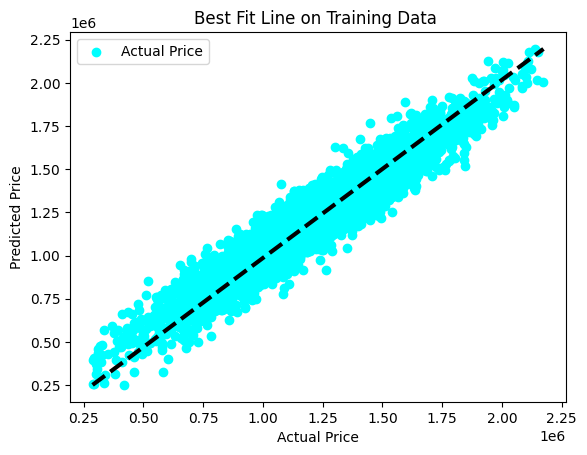

In [97]:
training_data(y_train,y_train_pred)

In [98]:
def testing_data(actual,predicted):

    mse = mean_squared_error(actual,predicted)
    mae = mean_absolute_error(actual,predicted)
    rmse = np.sqrt(mean_squared_error(actual,predicted))
    r2 = r2_score(actual,predicted)

    print(f"mean_squared_error : {mse}")
    print(f"mean_absolute_error : {mae}")
    print(f"root_mean_squared_error : {rmse}")
    print(f"r2_score  : {r2}")

    plt.scatter(actual,predicted,label = "Actual Price",color = "green")
    plt.plot([actual.min(),actual.max()],[predicted.min(),predicted.max()],color = "k",ls = "--",lw = 3)
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title("Best Fit Line on Testing Data ")
    plt.legend()
    plt.show()

mean_squared_error : 10416445748.159647
mean_absolute_error : 81661.79707164186
root_mean_squared_error : 102060.99033499355
r2_score  : 0.9079420510252475


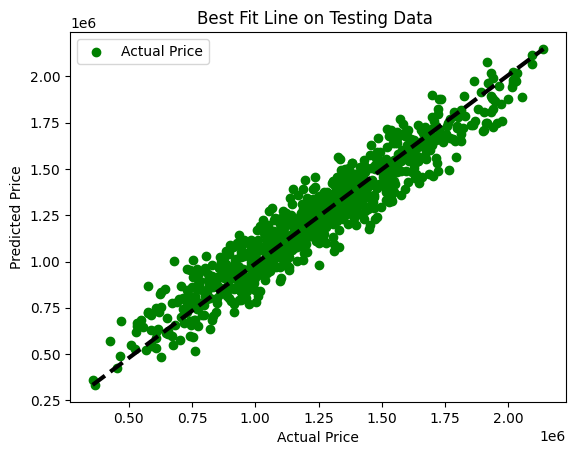

In [99]:
testing_data(y_test,y_test_pred)